<a href="https://colab.research.google.com/github/Bharti1020/Bharti1020-E-waste-classification-week-1/blob/main/week_2_progress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [62]:
!pip install tensorflow pandas numpy matplotlib scikit-learn

In [63]:
import tensorflow as tf  # Core TensorFlow library

from tensorflow.keras import layers, models, optimizers, callbacks  # Layers, model creation, optimizers, and training callbacks

from tensorflow.keras.models import Sequential, load_model  # For sequential model architecture and loading saved models

from tensorflow.keras.applications import EfficientNetV2B0  # Pretrained EfficientNetV2B0 model for transfer learning

from tensorflow.keras.applications.efficientnet import preprocess_input  # Preprocessing function specific to EfficientNet

import numpy as np  # Numerical operations and array handling

import matplotlib.pyplot as plt  # Plotting graphs and images

import seaborn as sns  # Plotting graphs and images

from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics for classification models

import gradio as gr  # Web interface library to deploy and test ML models

from PIL import Image

In [64]:
testpath= r'https:\\drive.google.com\drive\folders\1qamX9WhfdyipCd6mhPOqyg6lUUx0-Cpn'
trainpath= r'https:\\drive.google.com\drive\folders\16F6_8HEYOr-As5PX1pA4EOJSzrXdRKgq'
validpath = r'https://drive.google.com/drive/folders/1zFxUjNEY94QKeLP4kLZIqJYSD6TlrBna'

In [65]:
from google.colab import drive
import kagglehub

In [66]:
path = kagglehub.dataset_download("akshat103/e-waste-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/e-waste-image-dataset


In [67]:

path = kagglehub.dataset_download("akshat103/e-waste-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/e-waste-image-dataset


In [68]:

validpath = path + '/modified-dataset/test'

datavalid = tf.keras.utils.image_dataset_from_directory(validpath,
                                                        shuffle=True,
                                                        image_size=(128, 128),
                                                        batch_size=32,
                                                        validation_split=False)

Found 300 files belonging to 10 classes.


In [69]:
trainpath = path + '/modified-dataset/train'

datatrain = tf.keras.utils.image_dataset_from_directory(trainpath,
                                                        shuffle=True,
                                                        image_size=(128, 128),
                                                        batch_size=32,
                                                        validation_split=False)

Found 2400 files belonging to 10 classes.


In [70]:
datatest=tf.keras.utils.image_dataset_from_directory(path + '/modified-dataset/test',shuffle = False, image_size = (128,128), batch_size = 32, validation_split= False)

Found 300 files belonging to 10 classes.


In [71]:
print(len(datatrain.class_names))
class_names = datatrain.class_names
print(class_names)

10
['Battery', 'Keyboard', 'Microwave', 'Mobile', 'Mouse', 'PCB', 'Player', 'Printer', 'Television', 'Washing Machine']


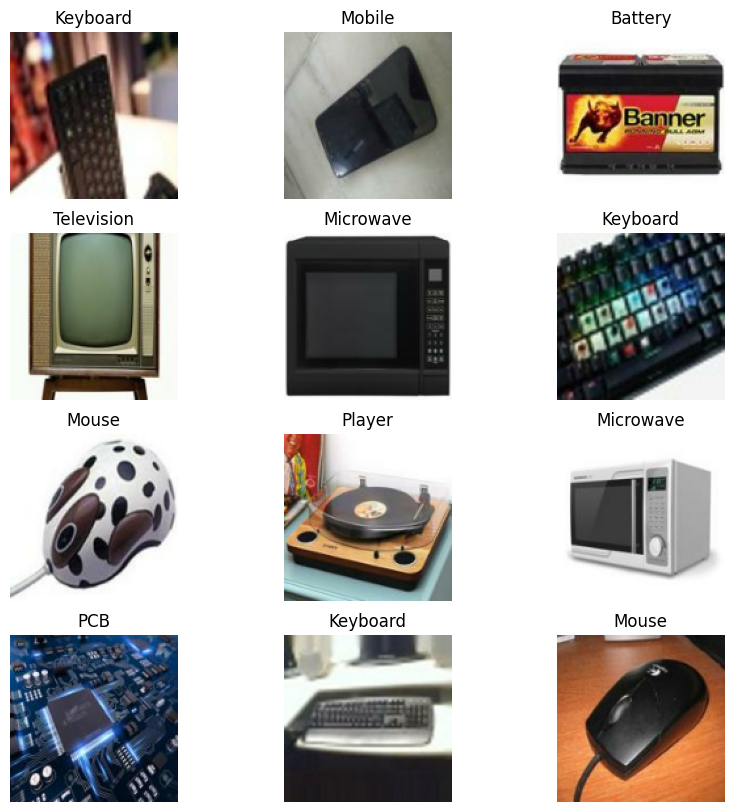

In [72]:
plt.figure(figsize=(10, 10))
for images, labels in datatrain.take(1):
    for i in range(12):

        ax = plt.subplot(4, 3, i + 1)


        plt.imshow(images[i].numpy().astype("uint8"))


        plt.title(class_names[labels[i]])


        plt.axis("off")

In [73]:
def plot_class_distribution(dataset, title="Class Distribution"):
  class_counts = {}
  for images, labels in dataset:
    for label in labels.numpy():
      class_name = dataset.class_names[label]
      class_counts[class_name] = class_counts.get(class_name, 0) + 1

In [74]:
class_names   = list(class_counts.keys())
counts = list(class_counts.values())

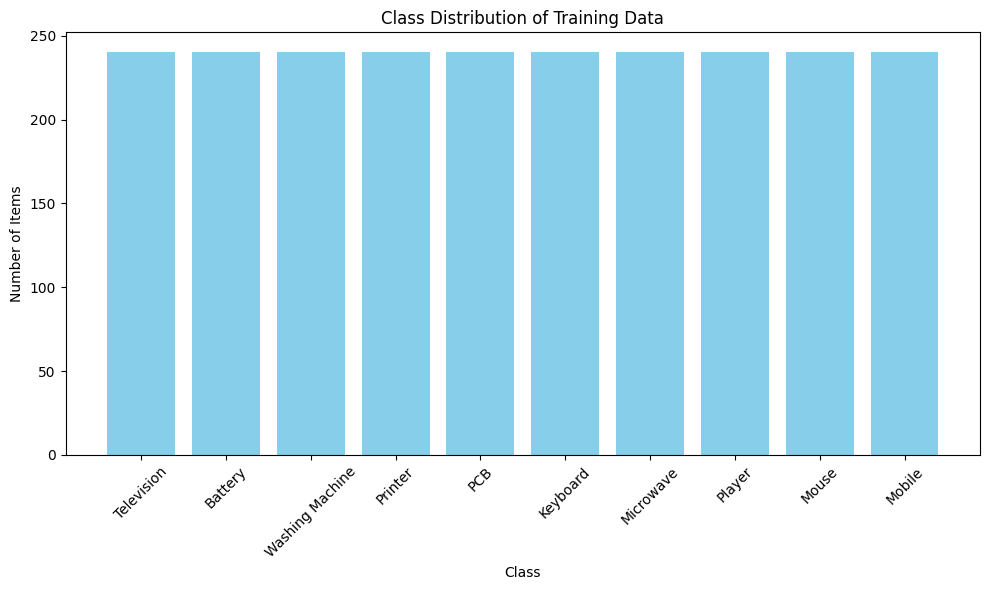

In [75]:
plt.figure(figsize=(10, 6))
plt.bar(class_names, counts, color='skyblue')
plt.xlabel("Class")
plt.ylabel("Number of Items")
plt.title(title)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [76]:
plot_class_distribution(datatrain, "Training Data Distribution")
plot_class_distribution(datavalid, "Validation Data Distribution")
plot_class_distribution(datatest, "Test Data Distribution")

In [77]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])

In [78]:
base_model = tf.keras.applications.EfficientNetV2B0(
    input_shape=(128, 128, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = True
for layer in base_model.layers[:100]:
    layer.trainable = False

In [79]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(128, 128, 3)),
    data_augmentation,
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),loss = tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['Accuracy'])

In [80]:
early = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True     )

In [81]:
epochs = 15


history = model.fit(
    datatrain,
    validation_data=datavalid,
    epochs=epochs,
    batch_size=100,
    callbacks=[early]
)

Epoch 1/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 102s 939ms/step - Accuracy: 0.2182 - loss: 2.1892 - val_Accuracy: 0.7567 - val_loss: 1.2987
Epoch 2/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 915ms/step - Accuracy: 0.7736 - loss: 1.0631 - val_Accuracy: 0.8967 - val_loss: 0.5677
Epoch 3/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 67s 897ms/step - Accuracy: 0.8690 - loss: 0.5504 - val_Accuracy: 0.9467 - val_loss: 0.3183
Epoch 4/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 908ms/step - Accuracy: 0.8979 - loss: 0.3661 - val_Accuracy: 0.9433 - val_loss: 0.2356
Epoch 5/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 88s 991ms/step - Accuracy: 0.9299 - loss: 0.2727 - val_Accuracy: 0.9567 - val_loss: 0.1848
Epoch 6/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - Accuracy: 0.9359 - loss: 0.2166 - val_Accuracy: 0.9567 - val_loss: 0.1610
Epoch 7/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 82s 996ms/step - Accuracy: 0.9554 - loss: 0.1538 - val_Accuracy: 0.9567 - val_loss: 0.1452
Epoch 8/15
75/75 ━━━━━━━━━━━━━━━━━━━━ 80s 975ms/step - Accuracy: 0.9694 - loss: 0.1292 - val_Accura

In [82]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetv2-b0 (Functional)  │ (None, 4, 4, 1280)     │     5,919,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        12,810 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,269,040 (62.06 MB)

 Trainable params: 5,168,458 (19.72 MB)

 Non-trainable params: 763,664 (2.91 MB)

 Optimizer params: 10,336,918 (39.43 MB)

In [83]:
base_model.summary()

Model: "efficientnetv2-b0"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6       │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_2         │ (None, 128, 128,  │          0 │ input_layer_6[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 128, 128,  │          0 │ rescaling_2[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 64, 64,    │        864 │ normalization_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 64, 64,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 64, 64,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 64, 64,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 64, 64,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 64, 64,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 32, 32,    │      9,216 │ block1a_project_… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 32, 32,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 32, 32,    │          0 │ block2a_expand_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_co… │ (None, 32, 32,    │      2,048 │ block2a_expand_a… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_project_bn  │ (None, 32, 32,    │        128 │ block2a_project_… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_conv │ (None, 32, 32,    │     36,864 │ block2a_project_… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_bn   │ (None, 32, 32,    │        512 │ block2b_expand_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2b_expand_act… │ (None, 32, 32,    │          0 │ block2b_expand_b

 Total params: 5,919,312 (22.58 MB)

 Trainable params: 5,155,648 (19.67 MB)

 Non-trainable params: 763,664 (2.91 MB)

In [84]:
acc = history.history['Accuracy']
val_acc = history.history['val_Accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

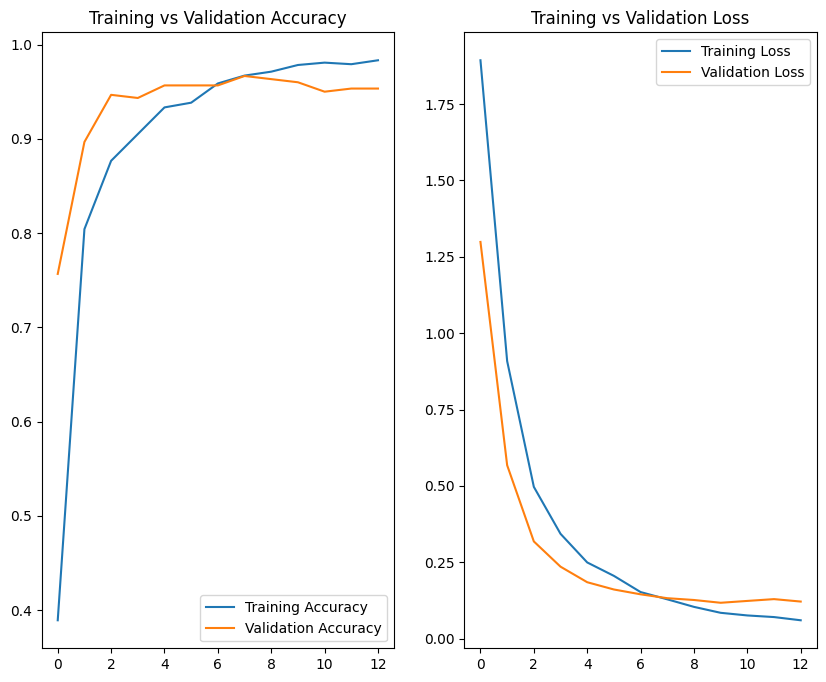

In [85]:
epochs_range = range(len(acc))

plt.figure(figsize=(10, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training vs Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training vs Validation Loss')

plt.show()

In [86]:
loss, accuracy = model.evaluate(datatest)
print(f'Test accuracy is{accuracy:.4f}, Test loss is {loss:.4f}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - Accuracy: 0.9536 - loss: 0.1324
Test accuracy is0.9600, Test loss is 0.1175


In [87]:
y_true = np.concatenate([y.numpy() for x, y in datatest], axis=0)

y_pred_probs = model.predict(datatest)

y_pred = np.argmax(y_pred_probs, axis=1)


print(confusion_matrix(y_true, y_pred))
print(classification_report(y_true, y_pred))

10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 532ms/step
[[28  0  0  0  0  2  0  0  0  0]
 [ 1 29  0  0  0  0  0  0  0  0]
 [ 0  0 27  0  0  0  1  1  1  0]
 [ 0  0  0 30  0  0  0  0  0  0]
 [ 0  0  0  0 29  0  0  1  0  0]
 [ 0  0  0  0  0 29  1  0  0  0]
 [ 0  0  0  0  0  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 30  0  0]
 [ 0  0  2  0  0  0  1  0 27  0]
 [ 0  0  0  0  0  0  1  0  0 29]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95        30
           1       1.00      0.97      0.98        30
           2       0.93      0.90      0.92        30
           3       1.00      1.00      1.00        30
           4       1.00      0.97      0.98        30
           5       0.94      0.97      0.95        30
           6       0.88      1.00      0.94        30
           7       0.94      1.00      0.97        30
           8       0.96      0.90      0.93        30
           9       1.00      0.97      0.98        30

    accuracy                    

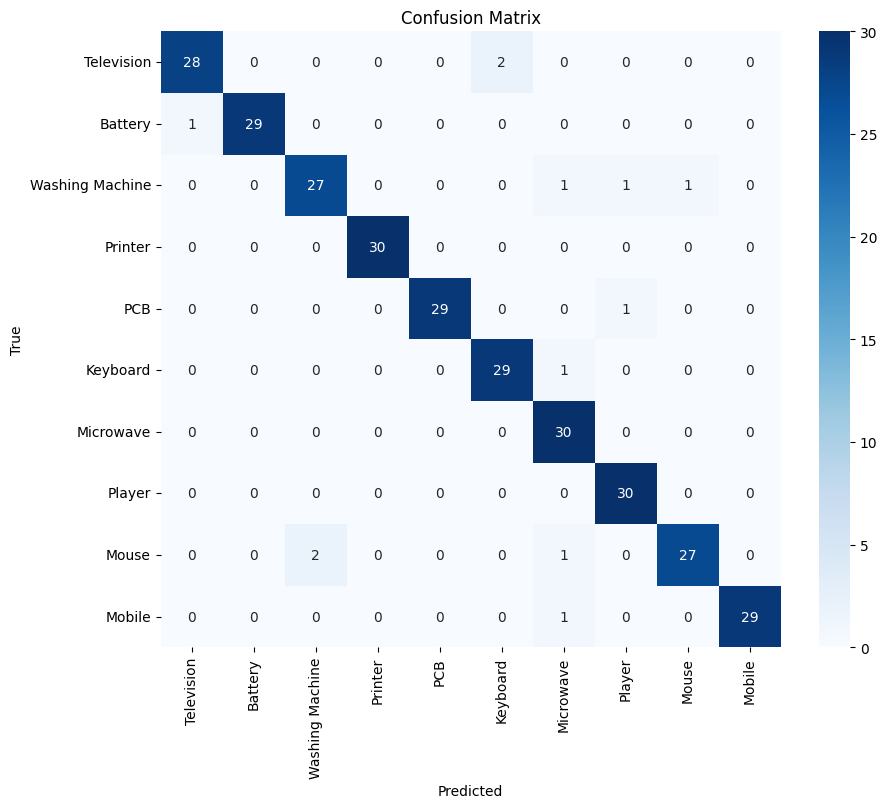

In [88]:
cm = confusion_matrix(y_true, y_pred)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names,
            cmap='Blues')

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()